In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C://Users//Shreyas//Downloads//dataset1.csv')
df = df[['Articles','Result']]
df = df[pd.notnull(df['Articles'])]
df.rename(columns = {'Articles':'narrative'}, inplace = True)
df.head(15)

,narrative,Result
0,"...drags Railways to CCIArshiya International,...",1
1,10 key faces in Modi govt and challenges their...,1
2,"19-year-old killed in an accident, truck set a...",0
3,24th February 2010: When Sachin Tendulkar rewr...,0
4,3 from same family die after car rolls into di...,0
5,"7/11 train blasts: 11 years on, safety still a...",1
6,‘Denuclearization’: Donald Trump teases ahead ...,0
7,‘Missing man’ formation marks tribute to IAF p...,0
8,‘Prime time minister continued shooting for fi...,0
9,"‘Sabka vinaash’: Yogi Adityanath’s take on SP,...",0


In [17]:
df.shape

(201, 2)

In [18]:
df.index = range(201)
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

#nltk.download()

80684

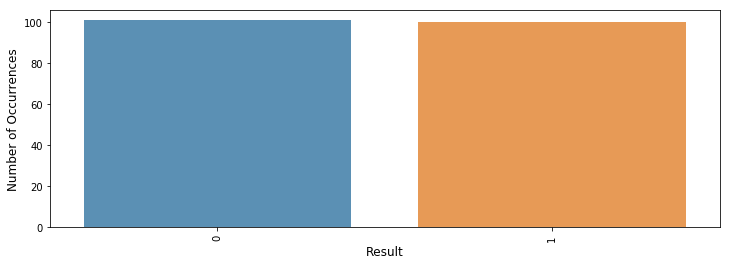

In [19]:
cnt_pro = df['Result'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show(); 

In [20]:
def print_complaint(index):
    example = df[df.index == index][['narrative', 'Result']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Result:', example[1])
print_complaint(12)


After Elphinstone station stampede, Tendulkar sanctions Rs 2 cr from MP fund for Mumbai FOB workCricket icon and Rajya Sabha member Sachin Tendulkar has sanctioned Rs 2 crore from his Members of Parliament Local Area Development Scheme (MPLADS) fund for revamp of rail foot overbridges in Mumbai here in the backdrop of the Elphinstone Road station stampede.On September 29, 23 people were killed in the rush-hour stampede on a narrow foot overbridge (FOBs) linking Elphinstone Road and Parel suburban stations during heavy rain.Tendulkar, in a letter to Railway Minister Piyush Goyal, said he is requesting the Mumbai suburban district collector to authorise Rs 2 crore for constructions.He said Rs 1 crore each be alloted to Western Railway and Central Railway from his MPLADS fund “towards immediate revamp and construction of FOBs in as many high density, single bridge stations on the Western, Central (Main) and Central (Harbour) lines” that the official may deem urgent.“The recent incident at

In [21]:
print_complaint(0)

...drags Railways to CCIArshiya International, the private train operator, has dragged the Indian Railways to Competition Commission of India (CCI) for not disclosing certain clauses while signing concessionary agreement and raising haulage charges. The CCI is expected to announce its observations in April.Ajay Mittal, chairman, Arshiya International said, "There are many private players including the steel and coal companies who are not happy with the Indian Railways but they do not want to cross swords with the ministry."The railway ministry in September increased the haulage charges by 170 to 200% for petroleum products, cement, stone, iron and steel.
Result: 1


In [22]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['narrative'] = df['narrative'].apply(cleanText)

In [24]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Result]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Result]), axis=1)

In [27]:
train_tagged.values[12]

TaggedDocument(words=['csir-ugc', 'net', '2019', 'application', 'process', 'begins', 'registration', 'closes', 'on', 'march', '18csir', 'net', '2019', 'registration', 'update', 'the', 'online', 'registration', 'process', 'for', 'council', 'of', 'scientific', 'and', 'industrial', 'research', 'csir', 'ugc', 'net', 'eaminations', 'june', '2019', 'began', 'on', 'monday', 'february', '25.the', 'online', 'registration', 'process', 'for', 'council', 'of', 'scientific', 'and', 'industrial', 'research', 'csir', 'ugc', 'net', 'eaminations', 'june', '2019', 'began', 'on', 'monday', 'february', '25.', 'the', 'eamination', 'is', 'scheduled', 'to', 'be', 'conducted', 'on', 'june', '16.candidates', 'can', 'apply', 'for', 'the', 'eam', 'by', 'visiting', 'the', 'official', 'website', 'of', 'csir', 'at', 'csirhrdg.res.in', 'click', 'on', 'the', 'link', 'for', 'applying', 'online', 'to', 'proceed', 'the', 'link', 'for', 'registration', 'is', 'not', 'opening', 'at', 'the', 'moment', 'candidates', 'may', '

In [28]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [37]:
model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=5, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<?, ?it/s]


In [38]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<?, ?it/s]


Wall time: 2.77 s


In [39]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors


In [43]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(X_test,y_pred)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-6.1483759e-01, -2.4230261e+00, -8.0324143e-01,  2.5949652e+00,
       -2.4008892e+00,  2.0936942e+00,  1.1714666e+00, -3.0564046e+00,
       -1.7668617e+00,  1.2678280e+00,  2.7356238e+00, -2.0624952e+00,
       -1.6599580e+00,  1.9857531e+00,  5.5408698e-01, -8.7411225e-01,
       -3.1907964e-01,  2.7330908e-01, -1.3135375e+00,  2.3365192e-01,
       -5.9936821e-01,  2.2073424e-01,  4.3726915e-01,  1.5363171e+00,
        1.4333012e+00, -1.1031550e-01,  7.6039255e-01,  1.7557737e-01,
       -4.3156305e-01,  2.2757480e-01,  1.1148436e-01, -1.9929336e+00,
       -4.5424551e-01, -8.7017524e-01,  2.5738043e-01,  7.9387128e-01,
       -8.8066071e-01,  1.6799612e+00, -9.1128689e-01, -5.8987182e-01,
       -1.0037022e+00,  1.1707116e+00, -1.7674874e+00,  1.2664329e+00,
       -7.8367525e-01, -7.6642320e-02, -1.5393037e+00,  1.6436756e+00,
       -1.6186838e-01, -1.2328137e+00,  2.1218550e+00,  1.2706827e+00,
       -6.1599661e-02,  1.7211994e+00, -3.8939720e-01,  6.2873489e-01,
     

      dtype=float32)) [1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1]
Testing accuracy 0.8688524590163934
Testing F1 score: 0.8687819495857572
